In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import dataloader
import matplotlib.pyplot as plt

In [2]:
batch_size = 32
learning_rate = 0.001
num_epochs = 10

In [3]:
train_losses = []
test_accuracies = []

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

In [5]:
train_dataset = datasets.FashionMNIST(root = './data', train = True, download = True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)


In [6]:
train_loader = dataloader.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = dataloader.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [7]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [8]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

In [9]:
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)

    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')

Epoch [1/10], Loss: 0.7512, Accuracy: 78.95%
Epoch [2/10], Loss: 0.4310, Accuracy: 85.71%
Epoch [3/10], Loss: 0.3723, Accuracy: 86.27%
Epoch [4/10], Loss: 0.3374, Accuracy: 86.36%
Epoch [5/10], Loss: 0.3116, Accuracy: 88.25%
Epoch [6/10], Loss: 0.2918, Accuracy: 88.90%
Epoch [7/10], Loss: 0.2759, Accuracy: 89.15%
Epoch [8/10], Loss: 0.2637, Accuracy: 89.34%
Epoch [9/10], Loss: 0.2528, Accuracy: 89.47%
Epoch [10/10], Loss: 0.2411, Accuracy: 89.30%


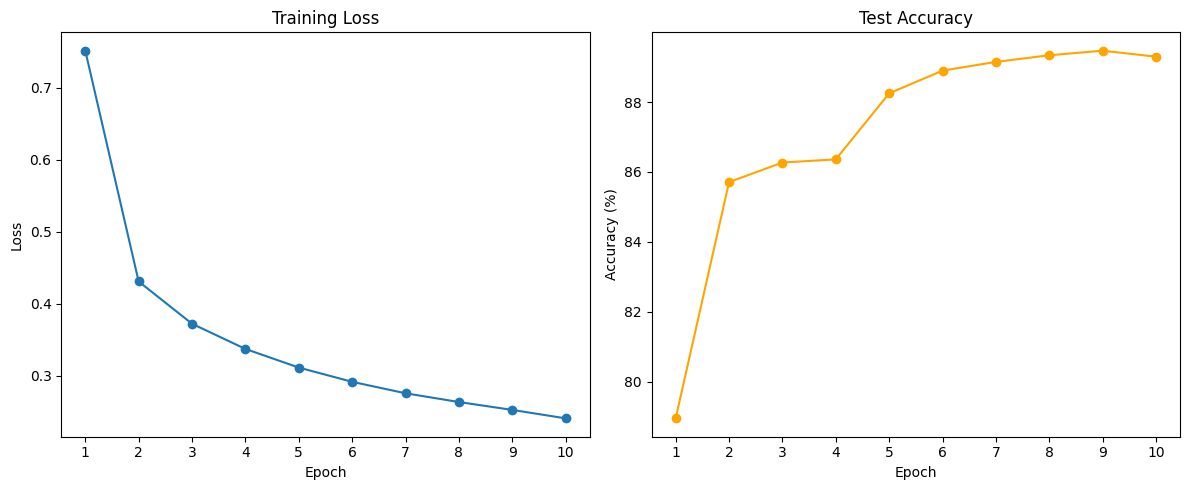

In [10]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, marker='o')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1, num_epochs + 1))

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), test_accuracies, marker='o', color='orange')
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.xticks(range(1, num_epochs + 1))

plt.tight_layout()
plt.show()